VERSION EN DESARROLLO

# Diseño de los datos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate
import random

random.seed(2021) # fix random number generator

In [ ]:
class forward_mapping:
    """
    This class simulates the Lorenz system direct problem
    """  
    def __init__(self,sigma=10.0,rho=28.0,beta=8.0/3.0):
        self.sigma = sigma # Prandtl number
        self.rho = rho     # Rayleigh number
        self.beta = beta   # layer dimension
        self.t_iv = np.arange(0.0, 1000.0, 0.01)
        self.t_data = np.arange(0.0, 4.0, 0.1) 
        self.f_data = np.arange(0.0, 16.0, 0.1)
    
    def rhs(self,w,t):
        """
        Evaluate right hand side of the Lorenz system
        """
        return [self.sigma*(w[1] - w[0]),
                w[0]*(self.rho - w[2]) - w[1],
                w[0]*w[1] - self.beta*w[2]]

    def jac(self,w,t):
        """
        Evaluate Jacobian of the Lorenz system right hand side
        """
        return [[-self.sigma,self.sigma,0],
                [self.rho-w[2],-1,-w[0]],
                [w[1],w[0],-self.beta]]

    def get_iv(self):
        """
        Get an initial value that lies on the attractor
        """
        x0 = [1,1,1]
        return integrate.odeint(self.rhs,x0,self.t_iv,Dfun=self.jac)[-1,:]
    
    def simulate(self,p):
        """
        Simulate from the initial value problem
        """
        soln = integrate.odeint(self.rhs,p,self.t_data,Dfun=self.jac)
        return soln    

    def make_data(self):
        """
        Generate data
        """
        self.iv = self.get_iv()
        soln = integrate.odeint(self.rhs,self.iv,self.f_data,Dfun=self.jac)
        self.std = soln.max(axis=0)/10.0**2
        soln += self.std*np.random.randn(160,3)
        return soln
    
    def future_data(self):
        """
        Generate future data for comparison
        """
        self.iv = self.get_iv()
        soln = integrate.odeint(self.rhs,self.iv,self.f_data,Dfun=self.jac)
        self.std = soln.max(axis=0)/10.0**2
        soln += self.std*np.random.randn(160,3)
        return soln

    def make_future_data(self, p, t_i, t_f):
        """
        Generate future data for comparison
        """
        x0 = p
        soln = integrate.odeint(self.rhs,x0,self.f_data,Dfun=self.jac)[t_i:t_f,:]
        return soln

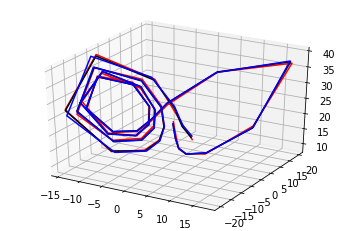

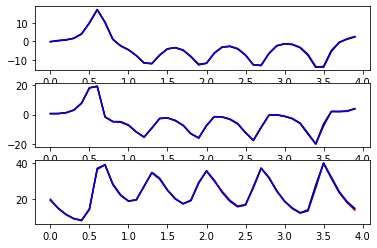

<Figure size 432x288 with 0 Axes>

In [ ]:
if __name__ == "__main__":
    
    fm = forward_mapping() #initialize class
    data = fm.make_data()  # make synthetic data
    true_p = fm.get_iv()   # get the true initial value 
    soln = fm.simulate(true_p) # solve the ivp for the true value
    random_p = true_p+10**-2*np.random.randn(3) # random perturbation of iv
    random_soln = fm.simulate(random_p) # solve the ivp for the perturbed iv    
    ax = plt.figure().add_subplot(projection='3d')
    fig, axs = plt.subplots(3)         
    ax.plot(data[:, 0], data[:, 1], data[:, 2],'r') #data
    ax.plot(soln[:, 0], soln[:, 1], soln[:, 2],'k') #true
    ax.plot(random_soln[:, 0], random_soln[:, 1], random_soln[:, 2],'b') #perturbed       
    axs[0].plot(fm.t_data,data[:,0],'r')
    axs[0].plot(fm.t_data,soln[:,0],'k')    
    axs[0].plot(fm.t_data,random_soln[:,0],'b')        
    axs[1].plot(fm.t_data,data[:,1],'r')
    axs[1].plot(fm.t_data,soln[:,1],'k')    
    axs[1].plot(fm.t_data,random_soln[:,1],'b')        
    axs[2].plot(fm.t_data,data[:,2],'r')
    axs[2].plot(fm.t_data,soln[:,2],'k')    
    axs[2].plot(fm.t_data,random_soln[:,2],'b')        
    plt.show()
    plt.savefig('DiseñoDatos_V2.png')


In [ ]:
print(data[39,:])

[ 2.27922745  4.07390312 14.29387599]


In [ ]:
print(data[20,:])

[-12.19505601  -7.1457185   36.771458  ]


In [ ]:
print(true_p)

[-0.22645953  0.60372242 19.37593389]


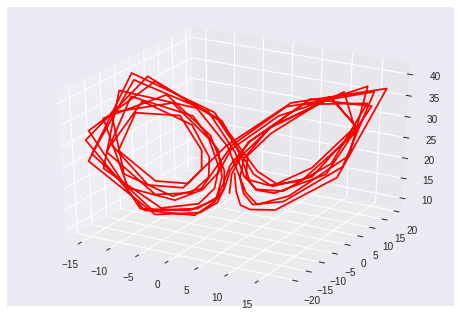

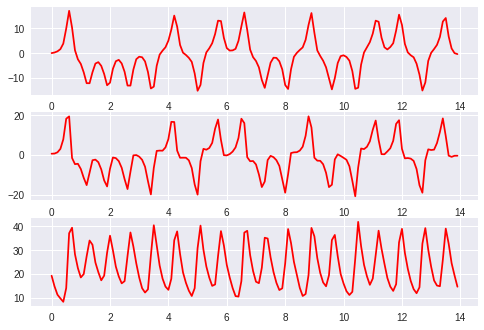

In [ ]:
if __name__ == "__main__":
    
    fm = forward_mapping() #initialize class
    data = fm.future_data()  # make synthetic future data
    true_p = fm.get_iv()   # get the true initial value 
    #soln = fm.simulate(true_p) # solve the ivp for the true value
    #random_p = true_p+10**-2*np.random.randn(3) # random perturbation of iv
    #random_soln = fm.simulate(random_p) # solve the ivp for the perturbed iv    
    ax = plt.figure().add_subplot(projection='3d')
    fig, axs = plt.subplots(3)         
    ax.plot(data[:, 0], data[:, 1], data[:, 2],'r') #data
    #ax.plot(soln[:, 0], soln[:, 1], soln[:, 2],'k') #true
    #ax.plot(random_soln[:, 0], random_soln[:, 1], random_soln[:, 2],'b') #perturbed       
    axs[0].plot(fm.f_data,data[:,0],'r')
    #axs[0].plot(fm.t_data,soln[:,0],'k')    
    #axs[0].plot(fm.t_data,random_soln[:,0],'b')        
    axs[1].plot(fm.f_data,data[:,1],'r')
    #axs[1].plot(fm.t_data,soln[:,1],'k')    
    #axs[1].plot(fm.t_data,random_soln[:,1],'b')        
    axs[2].plot(fm.f_data,data[:,2],'r')
    #axs[2].plot(fm.t_data,soln[:,2],'k')    
    #axs[2].plot(fm.t_data,random_soln[:,2],'b')        
    plt.show()


In [ ]:
print(data[81,:])

[-14.38469926  -9.68313199  38.84688184]


In [ ]:
print(data[39,:])

[ 1.87558657  3.83587151 14.18749332]


In [ ]:
print(true_p)

[-0.22645953  0.60372242 19.37593389]


# Requisitos


In [ ]:
!pip install corner
import corner 

In [ ]:
#import pytwalk
from scipy import integrate
from xlrd import open_workbook
import scipy.stats as ss
import numpy as np
import scipy as sp
import random
#import corner
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pylab as pl
from numpy.random import uniform, normal
from numpy import ones, zeros, cumsum, shape, mat, cov, mean, ceil, matrix, sqrt
from numpy import floor, exp, log, sum, pi, savetxt, loadtxt, array
from time import time, localtime, strftime
from pylab import plot, hist, xlabel, ylabel, title
# WARNING: pylab module not available, Ana, TS and Hist methods will fail.")
from scipy import integrate, optimize


In [ ]:
## square of the norm.
def SqrNorm(x):
    return sum(x*x) 

log2pi = log(2*pi)
log3 = log(3.0)

def Remain( Tr, it, sec1, sec2):
    """ Remaining time Information messages:
        total iterations Tr, current it, start time, current time, as returned by time() (floats)."""

    # how many seconds remaining
    ax = int( (Tr - it) *  ((sec2 - sec1)/it) )


    if (ax < 1):

        return " "

    if (ax < 60):

        return "Finish in approx. %d sec." % (ax,)

    if (ax <= 360):

        return "Finish in approx. %d min and %d sec." % ( ax // 60, ax % 60)

    if (ax > 360):

        ax += sec2  # current time plus seconds remaining=end time
        return "Finish by " + strftime("%a, %d %b %Y, %H:%M.", localtime(ax))


## Pytwalk

In [ ]:
class pytwalk:
    """This is the t-walk class.

    Initiates defining the dimension n, Supp= defines the support
    returns True if x within the support and False otherwise,
    and U= -log of the objective function, eg:

    Mytwalk = pytwalk( n=3, U=MyMinusLogf, Supp=MySupportFunction).

    or
    
    t positive, u= -log likelihood and w= -log prior 

    Mytwalk = pytwalk( n=3, t=0.5, u=MyMinusLoglikelihood, w=MyMinusLogPrior, Supp=MySupportFunction).

    In this case the objective function is U= t*u + w and u, for x (not xp)
    is saved in self.Output_u.  This is a backwards compatible implementation for
    penilized likelihood for thermodynamicl integral to estimate
    normalizing constants.

    Then do: Mytwalk.Run?

    Other parameter are:
    ww= the prob. of choosing each kernel, aw, at, n1phi (see inside twalk.py)
    with default values as in the paper, normally NOT needed to be changed."""

    def __init__( self, n, U=(lambda x: sum(0.5*x**2)), Supp=(lambda x: True),
        t=-1, u=(lambda x: sum(0.5*x**2)), w=(lambda x: 0.0),
        ww=[0.0000, 0.4918, 0.4918, 0.0082 + 0.0082, 0.0], aw=1.5, at=6.0, n1phi=4.0):
        ### Careful the Hop move does not work!!
        self.n = n
        self.t = t
        if self.t >= 0: ### Penilized likelihood
            self.LikelihoodEnergy = u
            self.PriorEnergy = w
            self.Output_u = array([0.0])
        else:  ### Usual case
            self.PriorEnergy = (lambda x: 0.0) 
            self.LikelihoodEnergy = U
            self.t = 1.0
        self.U = (lambda x: self.Energy(x))
        self.Supp = Supp
        self.Output = zeros((1, n+1)) ### No data (MCMC output) yet
        self.Output_u = array([0.0]) ### To save ll_e, the likelihood energy
        self.T = 1
        self.Acc = zeros(6)  ### To save the acceptance rates of each kernel, and the global acc. rate

        #### Kernel probabilities
        self.Fw = cumsum(ww)
        
        #### Parameters for the propolsals
        self.aw = aw  ### For the walk move
        self.at = at ### For the Traverse move

        #n1phi = 5 ### expected value of parameters to move
        self.pphi = min( n, n1phi)/(1.0*n) ### Prob. of choosing each par.
        
        self.WAIT = 30

    def Energy( self, x):
        self.ll_e = self.LikelihoodEnergy(x)
        self.prior_e = self.PriorEnergy(x)
        return self.t*self.ll_e + self.prior_e

    def _SetUpInitialValues( self, x0, xp0):
        """Private method."""

        ### Check x0 and xp0 in the support

        if any(abs(x0 -xp0) <= 0):
            print("pytwalk: ERROR, not all entries of initial values different.")
            return [ False, 0.0, 0.0]

        if not(self.Supp(x0)):
            print("pytwalk: ERROR, initial point x0 out of support.")
            return [ False, 0.0, 0.0]
        u = self.U(x0)

        if not(self.Supp(xp0)):
            print("pytwalk: ERROR, initial point xp0 out of support.")
            return [ False, u, 0.0]
        up = self.U(xp0)
        
        return [ True, u, up]



    def Run( self, T, x0, xp0, t=1):
        """Run the twalk.
        
           Run( T, x0, xp0),
           T = Number of iterations.
           x0, xp0, two initial points within the support,
           ***each entry of x0 and xp0 most be different***. 
        """
        
        self.t = t

        sec = time()
        print("pytwalk: Running the twalk with %d iterations"\
            % (T,), end=' ')
        if self.t == 1:
            print(". ",  strftime("%a, %d %b %Y, %H:%M:%S.", localtime(sec)))
        else:
            print(" (%f). " % (self.t,), strftime("%a, %d %b %Y, %H:%M:%S.", localtime(sec)))

        ### Check x0 and xp0 are in the support
        [ rt, u, up] = self._SetUpInitialValues( x0, xp0)

        if (not(rt)):
            return 0
        

        ### send an estimation for the duration of the sampling if 
        ### evaluating the ob. func. twice (in self._SetUpInitialValues) takes more than one second

        sec2 = time() # last time we sent a message
        print("       " + Remain( T, 2, sec, sec2))

        x = x0     ### Use x and xp by reference, so we can retrive the last values used
        xp = xp0

        ### Set the array to place the iterations and the U's ... we donot save up's
        self.Output = zeros((T+1, self.n+1))
        self.Output_u = zeros(T+1)
        self.T = T+1
        self.Acc = zeros(6)
        kercall = zeros(6) ## Times each kernel is called

        
        self.Output[ 0, 0:self.n] = x.copy()
        self.Output[ 0, self.n] = u
        self.Output_u[0] = self.ll_e

        j1=1
        j=0

        ### Sampling  
        for it in range(T):
            y, yp, ke, A, u_prop, up_prop = self.onemove( x, u, xp, up)

            kercall[ke] += 1
            kercall[5] += 1 
            if (uniform() < A):  
                x = y.copy()   ### Accept the propolsal y
                u = u_prop
                xp = yp.copy()   ### Accept the propolsal yp
                up = up_prop
                
                self.Acc[ke] += 1
                self.Acc[5] += 1


            ### To retrive the current values
            self.x = x
            self.xp = xp
            self.u = u
            self.up = up

            self.Output[it+1,0:self.n] = x.copy()
            self.Output[it+1,self.n] = u
            self.Output_u[it+1] = self.ll_e

            ### Estimate the remaing time, every 2**j1 iterations
            if ((it % (1 << j1)) == 0):

                j1 += 1
                j1 = min( j1, 10)  # check the time at least every 2^10=1024 iterations
                ax = time()
                if ((ax - sec2) > (1 << j)*self.WAIT): # Print an estimation every WAIT*2**j 

                    print("pytwalk: %10d iterations so far. " % (it,) + Remain( T, it, sec, ax))
                    sec2 = ax
                    j += 1
                    j1 -= 1 # check the time as often 
        
        if (self.Acc[5] == 0):
            print("pytwalk: WARNING,  all propolsals were rejected!")
            print(strftime("%a, %d %b %Y, %H:%M:%S.", localtime(time())))
            return 0
        else:
            print("pytwalk: finished, " + strftime("%a, %d %b %Y, %H:%M:%S.", localtime(time())))

        for i in range(6):
            if kercall[i] != 0:
                self.Acc[i] /= kercall[i]
        return 1


    def  onemove( self, x, u, xp, up):
        """One move of the twalk.  This is basically the raw twalk kernel.
           It is usefull if the twalk is needed inside a more complex MCMC.
        
           onemove(x, u, xp, up),
           x, xp, two points WITHIN the support ***each entry of x0 and xp0 must be different***.
           and the value of the objective at x, and xp
           u=U(x), up=U(xp).
           
           It returns: [y, yp, ke, A, u_prop, up_prop]
           y, yp: the proposed jump
           ke: The kernel used, 0=nothing, 1=Walk, 2=Traverse, 3=Blow, 4=Hop
           A: the M-H ratio
           u_prop, up_prop: The values for the objective func. at the proposed jumps 
        """

        #### Make local references for less writing
        n = self.n
        U = self.U
        Supp = self.Supp
        Fw = self.Fw
        
        ker = uniform() ### To choose the kernel to be used
        ke = 1
        A = 0
        
        ## Kernel nothing exchange x with xp, not used
        if ((0.0 <= ker) & (ker < Fw[0])): 
            ke = 0
            y = xp.copy()
            up_prop = u
            yp = x.copy()
            u_prop = up
            ### A is the MH acceptance ratio
            A = 1.0;  #always accepted


        ## The Walk move
        if ((Fw[0] <= ker) & (ker < Fw[1])):
            
            ke = 1

            dir = uniform()

            if ((0 <= dir) & (dir < 0.5)):  ## x as pivot
        
                yp = self.SimWalk( xp, x)

                y = x.copy()
                u_prop = u

                if ((Supp(yp)) & (all(abs(yp - y) > 0))):
                    up_prop = U(yp)
                    A = exp(up - up_prop)
                else:
                    up_prop = None
                    A = 0; ##out of support, not accepted
                        
            else:  ## xp as pivot

                y = self.SimWalk( x, xp)

                yp = xp.copy()
                up_prop = up

                if ((Supp(y)) & (all(abs(yp - y) > 0))):
                    u_prop = U(y)
                    A = exp(u - u_prop)
                else:
                    u_prop = None
                    A = 0; ##out of support, not accepted


        #### The Traverse move
        if ((Fw[1] <= ker) & (ker < Fw[2])):

            ke = 2
            dir = uniform()

            if ((0 <= dir) & (dir < 0.5)):  ## x as pivot

                beta = self.Simbeta()
                yp = self.SimTraverse( xp, x, beta)

                y = x.copy()
                u_prop = u
                
                if Supp(yp):                
                    up_prop = U(yp)
                    if (self.nphi == 0):
                        A = 1 ###Nothing moved
                    else:
                        A = exp((up - up_prop) +  (self.nphi-2)*log(beta))
                else:
                    up_prop = None
                    A = 0 ##out of support, not accepted
            else:            ## xp as pivot

                beta = self.Simbeta()
                y = self.SimTraverse( x, xp, beta)

                yp = xp.copy()
                up_prop = up

                if Supp(y):
                    u_prop = U(y)
                    if (self.nphi == 0):
                        A = 1 ###Nothing moved
                    else:
                        A = exp((u - u_prop) +  (self.nphi-2)*log(beta))
                else:
                    u_prop = None
                    A = 0 ##out of support, not accepted

        ### The Blow move
        if ((Fw[2] <= ker) & (ker < Fw[3])): 

            ke = 3
            dir = uniform()

            if ((0 <= dir) & (dir < 0.5)):  ## x as pivot
                yp = self.SimBlow( xp, x)
                
                y = x.copy()
                u_prop = u
                if ((Supp(yp)) & all(yp != x)):
                    up_prop = U(yp)
                    W1 = self.GBlowU( yp, xp,  x)
                    W2 = self.GBlowU( xp, yp,  x) 
                    A = exp((up - up_prop) + (W1 - W2))
                else:
                    up_prop = None
                    A = 0 ##out of support, not accepted
            else:  ## xp as pivot
                y = self.SimBlow( x, xp)

                yp = xp.copy()
                up_prop = up
                if ((Supp(y)) & all(y != xp)):
                    u_prop = U(y)
                    W1 = self.GBlowU(  y,  x, xp)
                    W2 = self.GBlowU(  x,  y, xp)
                    A = exp((u - u_prop) + (W1 - W2))
                else:
                    u_prop = None
                    A = 0 ##out of support, not accepted
        

        ### The Hop move
        if ((Fw[3] <= ker) & (ker < Fw[4])): 

            ke = 4
            dir = uniform()

            if ((0 <= dir) & (dir < 0.5)):  ## x as pivot
                yp = self.SimHop( xp, x)
                
                y = x.copy()
                u_prop = u
                if ((Supp(yp)) & all(yp != x)):
                    up_prop = U(yp)
                    W1 = self.GHopU( yp, xp,  x)
                    W2 = self.GHopU( xp, yp,  x) 
                    A = exp((up - up_prop) + (W1 - W2))
                else:
                    up_prop = None
                    A = 0 ##out of support, not accepted
            else:  ## xp as pivot
                y = self.SimHop( x, xp)

                yp = xp.copy()
                up_prop = up
                if ((Supp(y)) & all(y != xp)):
                    u_prop = U(y)
                    W1 = self.GHopU(  y,  x, xp)
                    W2 = self.GHopU(  x,  y, xp)
                    A = exp((u - u_prop) + (W1 - W2))
                else:
                    u_prop = None
                    A = 0 ##out of support, not accepted
        
        return [y, yp, ke, A, u_prop, up_prop]



#################################################################################
##### Auxiliars for the kernels

    ### Used by the Walk kernel
    def SimWalk( self, x, xp):
        aw = self.aw
        n = self.n
        
        phi = (uniform(size=n) < self.pphi) ### parametrs to move
        self.nphi = sum(phi)
        z = zeros(n)

        for i in range(n):
            if phi[i]:
                u = uniform()
                z[i] = (aw/(1+aw))*(aw*u**2.0 + 2.0*u - 1.0)

        return x + (x - xp)*z

    #### Used by the Traverse kernel
    def Simbeta(self):
        at = self.at
        if (uniform() < (at-1.0)/(2.0*at)):
            return exp(1.0/(at+1.0)*log(uniform()))
        else:
            return exp(1.0/(1.0-at)*log(uniform()))

    def SimTraverse( self,  x, xp, beta):
        n = self.n
    
        phi = (uniform(size=n) < self.pphi)
        self.nphi = sum(phi)

        rt = x.copy()
        for i in range(n):
            if (phi[i]):
                rt[i] = xp[i] + beta*(xp[i] - x[i])
            
        return rt


    ### Used by the Blow kernel
    def SimBlow( self, x, xp):
        n = self.n
    
        self.phi = (uniform(size=n) < self.pphi)
        self.nphi = sum(self.phi)
    
        self.sigma = max(self.phi*abs(xp - x))

        rt = x.copy()
        for i in range(n):
            if (self.phi[i]):
                rt[i] = xp[i] + self.sigma * normal()
            
        return rt


    def GBlowU( self, h, x, xp):
        nphi = self.nphi
        self.sigma = max(self.phi*abs(xp - x)) #recalculate sigma, but same phi    
        if (nphi > 0):
            return (nphi/2.0)*log2pi + nphi*log(self.sigma) + 0.5*SqrNorm(h - xp)/(self.sigma**2)
        else:
            return 0


    ### Used by the Hop kernel
    def SimHop( self, x, xp):
        n = self.n
    
        self.phi = (uniform(size=n) < self.pphi)
        self.nphi = sum(self.phi)
    
        self.sigma = max(self.phi*abs(xp - x))/3.0

        rt = x.copy()
        for i in range(n):
            if (self.phi[i]): 
                rt[i] = x[i] + self.sigma * normal()

        return rt


    def GHopU( self, h, x, xp): ## It is actually equal to GBlowU!
        nphi = self.nphi
        self.sigma = max(self.phi*abs(xp - x))/3.0 ##Recalculate sigma, but same phi

        if (nphi > 0):
            return (nphi/2.0)*log2pi + nphi*log(self.sigma) + 0.5*SqrNorm(h - xp)/(self.sigma**2)
        else:
            return 0



#################################################################################
#####  Output analysis auxiliar methods

    def IAT( self, par=-1, start=0, end=0, maxlag=0):
        """Calculate the Integrated Autocorrelation Times of parameters par
           the default value par=-1 is for the IAT of the U's"""
        if (end == 0):
            end = self.T

        if (self.Acc[5] == 0):
            print("twalk: IAT: WARNING,  all propolsals were rejected!")
            print("twalk: IAT: Cannot calculate IAT, fixing it to the sample size.")
            return self.T

        iat = IAT( self.Output, cols=par, maxlag=maxlag, start=start, end=end)
        
        return iat
    

    def TS( self, par=-1, start=0, end=0):
        """Plot time sries of parameter par (defualt = log f) etc."""
        if par == -1:
            par = self.n
        
        if (end == 0):
            end = self.T

        if (par == self.n):
            plot( list(range( start, end)), -1*self.Output[ start:end, par])
            ylabel("Log of Objective")
        else:
            plot( list(range( start, end)), self.Output[ start:end, par])
            ylabel("Parameter %d" % par)
        xlabel("Iteration")


    def Ana( self, par=-1, start=0, end=0):
        """Output Analysis, TS plots, accepatnce rates, IAT etc."""
        if par == -1:
            par = self.n

        if (end == 0):
            end = self.T

        print("Acceptance rates for the Walk, Traverse, Blow and Hop kernels:" + str(self.Acc[1:5]))
        print("Global acceptance rate: %7.5f" % self.Acc[5])
        
        iat = self.IAT( par=par, start=start, end=end)
        print("Integrated Autocorrelation Time: %7.1f, IAT/n: %7.1f" % (iat, iat/self.n))
        
        self.TS( par=par, start=start, end=end)
        
        return iat


    def Hist( self, par=-1, start=0, end=0, g=(lambda x: x[0]), xlab=None, bins=20, density=False):
        """Basic histigrams and output analysis.  If par=-1, use g.
           The function g provides a transformation to be applied to the data,
           eg g=(lambda x: abs(x[0]-x[1]) would plot a histogram of the distance
           between parameters 0 and 1, etc."""

        if (end == 0):
            end = self.T

        if (par == -1):
            ser = zeros(end-start)
            for it in range(end-start):
                ser[it] = g(self.Output[ it+start, :-1])
            if (xlab == None):
                xlab = "g"
        else:
            ser = self.Output[ start:end, par]
            if (xlab == None):
                xlab = "parameter %d" % (par,)
            
        xlabel(xlab)
        print("Mean for %s= %f" % ( xlab, mean(ser)))
        return hist( ser, bins=bins, density=density)



    def Save( self, fnam, start=0, end=-1, thin=1):
        """Saves the Output as a text file, starting at start (burn in), with thinning (thin)."""

        print("Saving output, all pars. plus the U's in file", fnam)
        
        savetxt( fnam, self.Output[ start:end:thin,:])



    def Load( self, fnam, start=0, thin=1):
        """Loads the Output from a text file, typically written with the Save method.
           It will overwrite any other twalk output.  Updates the dimension n and the sample size T."""
        
        print("Loading output from file", fnam)
        
        self.Output = loadtxt(fnam)
        self.T, self.n = self.Output.shape
        self.n -= 1

        
##### A simple Random Walk M-H
    def RunRWMH( self, T, x0, sigma):
        """Run a simple Random Walk M-H"""

        sec = time() # last time we sent a message
        print("pytwalk: This is the Random Walk M-H running with %d iterations." % T)
        ### Local variables
        x = x0.copy()
        if not(self.Supp(x)):
            print("pytwalk: ERROR, initial point x0 out of support.")
            return 0
        self.T = T

        u = self.U(x)
        n = self.n

        sec2 = time() # last time we sent a message
        print("       " + Remain( T, 2, sec, sec2))

        ### Set the array to place the iterations and the U's
        self.Output = zeros((T+1, n+1))
        self.Acc = zeros(6)
                
        #### Make local references for less writing
        Output = self.Output
        U = self.U
        Supp = self.Supp
        Acc = self.Acc
        
        Output[ 0, 0:n] = x.copy()
        Output[ 0, n] = u

        j1=1
        j=0

        y = x.copy()
        for it in range(T):
            y = x + normal(size=n)*sigma ### each entry with sigma[i] variance 
            if Supp(y):        ### If it is within the support of the objective
                uprop = U(y)   ### Evaluate the objective
                if (uniform() < exp(u-uprop)):  
                    x = y.copy()   ### Accept the propolsal y
                    u = uprop
                    Acc[5] += 1

            ### Estimate the remaing time, every 2**j1 iterations
            if ((it % (1 << j1)) == 0):

                j1 += 1
                j1 = min( j1, 10)  # check the time at least every 2^10=1024 iterations
                ax = time()
                if ((ax - sec2) > (1 << j)*self.WAIT): # Print an estimation every WAIT*2**j 
                    print("pytwalk: %10d iterations so far. " % (it,) + Remain( T, it, sec, ax))
                    sec2 = ax
                    j += 1
                    j1 -= 1 # check the time as often 

            Output[it+1,0:n] = x
            Output[it+1,n] = u
        
        if (Acc[5] == 0):
            print("pytwalk: WARNING,  all propolsals were rejected!")
            return 0

        Acc[5] /= T;
        return 1




############################################################################################
#### Auxiliary functions to calculate Integrated autocorrelation times of a time series 


####  Calculates an autocovariance 2x2 matrix at lag l in column c of matrix Ser with T rows
####  The variances of each series are in the diagonal and the (auto)covariance in the off diag.
def AutoCov( Ser, c, la, T=0):
    if (T == 0):
        T = shape(Ser)[0]  ### Number of rows in the matrix (sample size)

    return cov( Ser[0:(T-1-la), c], Ser[la:(T-1), c], bias=1)
    
    
    

#### Calculates the autocorrelation from lag 0 to lag la of columns cols (list)
#### for matrix Ser
def AutoCorr( Ser, cols=0, la=1):
    T = shape(Ser)[0]  ### Number of rows in the matrix (sample size)

    ncols = shape(mat(cols))[1] ## Number of columns to analyse (parameters)

    #if ncols == 1:
    #    cols = [cols]
        
    ### Matrix to hold output
    Out = matrix(ones((la+1)*ncols)).reshape( la+1, ncols)
        
    for c in range(ncols):
        for l in range( 1, la+1):  
            Co = AutoCov( Ser, cols[c], l, T) 
            Out[l,c] = Co[0,1]/(sqrt(Co[0,0]*Co[1,1]))
    
    return Out
    

### Makes an upper band matrix of ones, to add the autocorrelation matrix
### gamma = auto[2*m+1,c]+auto[2*m+2,c] etc. 
### MakeSumMat(lag) * AutoCorr( Ser, cols=c, la=lag) to make the gamma matrix
def MakeSumMat(lag):
    rows = (lag)//2   ### Integer division!
    Out = mat(zeros([rows,lag], dtype=int))
    
    for i in range(rows): 
        Out[i,2*i] = 1
        Out[i,2*i+1] = 1
    
    return Out


### Finds the cutting time, when the gammas become negative
def Cutts(Gamma):
    cols = shape(Gamma)[1]
    rows = shape(Gamma)[0]
    Out = mat(zeros([1,cols], dtype=int))
    Stop = mat(zeros([1,cols], dtype=bool))
    
    if (rows == 1):
        return Out
        
    i = 0
    ###while (not(all(Stop)) & (i < (rows-1))):
    for i in range(rows-1):
        for j in range(cols):  ### while Gamma stays positive and decreasing
            if (((Gamma[i+1,j] > 0.0) & (Gamma[i+1,j] < Gamma[i,j])) & (not Stop[0,j])):
                Out[0,j] = i+1 ## the cutting time for colomn j is i+i
            else:
                Stop[0,j] = True
        i += 1
    
    
    return Out


####  Automatically find a maxlag for IAT calculations
def AutoMaxlag( Ser, c, rholimit=0.05, maxmaxlag=20000):
    Co = AutoCov( Ser, c, la=1)
    rho = Co[0,1]/Co[0,0]  ### lag one autocorrelation
    
    ### if autocorrelation is like exp(- lag/lam) then, for lag = 1
    lam = -1.0/log(abs(rho)) 
    
    ### Our initial guess for maxlag is 1.5 times lam (eg. three times the mean life)
    maxlag = int(floor(3.0*lam))+1
    
    ### We take 1% of lam to jump forward and look for the
    ### rholimit threshold
    jmp = int(ceil(0.01*lam)) + 1
    
    T = shape(Ser)[0]  ### Number of rows in the matrix (sample size)

    while ((abs(rho) > rholimit) & (maxlag < min(T//2,maxmaxlag))):
        Co = AutoCov( Ser, c, la=maxlag)
        rho = Co[0,1]/Co[0,0]
        maxlag = maxlag + jmp
        ###print("maxlag=", maxlag, "rho", abs(rho), "\n")
        
    maxlag = int(floor(1.3*maxlag));  #30% more
    
    if (maxlag >= min(T//2,maxmaxlag)): ###not enough data
        fixmaxlag = min(min( T//2, maxlag), maxmaxlag)
        print("AutoMaxlag: Warning: maxlag= %d > min(T//2,maxmaxlag=%d), fixing it to %d" % (maxlag, maxmaxlag, fixmaxlag))
        return fixmaxlag
    
    if (maxlag <= 1):
        fixmaxlag = 10
        print("AutoMaxlag: Warning: maxlag= %d ?!, fixing it to %d" % (maxlag, fixmaxlag))
        return fixmaxlag
        
    print("AutoMaxlag: maxlag= %d." % maxlag)
    return maxlag
    
    
### Find the IAT
def IAT( Ser, cols=-1,  maxlag=0, start=0, end=0):

    ncols = shape(mat(cols))[1] ## Number of columns to analyse (parameters)
    if ncols == 1:
        if (cols == -1):
            cols = shape(Ser)[1]-1 ### default = last column
        cols = [cols]
    
    if (end == 0):
        end = shape(Ser)[0]

    if (maxlag == 0):
        for c in cols:
            maxlag = max(maxlag, AutoMaxlag( Ser[start:end,:], c))

    #print("IAT: Maxlag=", maxlag)

    #Ga = MakeSumMat(maxlag) * AutoCorr( Ser[start:end,:], cols=cols, la=maxlag)
    
    Ga = mat(zeros((maxlag//2,ncols)))
    auto = AutoCorr( Ser[start:end,:], cols=cols, la=maxlag)
    
    ### Instead of producing the maxlag/2 X maxlag MakeSumMat matrix, we calculate the gammas like this
    for c in range(ncols):
        for i in range(maxlag//2):
            Ga[i,c] = auto[2*i,c]+auto[2*i+1,c]
    
    cut = Cutts(Ga)
    nrows = shape(Ga)[0]
        
    ncols = shape(cut)[1]
    Out = -1.0*mat(ones( [1,ncols] ))
    
    if any((cut+1) == nrows):
        print("IAT: Warning: Not enough lag to calculate IAT")
    
    for c in range(ncols):
        for i in range(cut[0,c]+1):
            Out[0,c] += 2*Ga[i,c]
    
    return Out



############################################################################################

# Modelo Bayesiano 1
Datos de 0 a 4, predicción hasta 8

In [ ]:
random.seed(2021)
fm = forward_mapping()
data = fm.make_data()[0:40,:]
    

In [ ]:
print(data)
print(data.shape)

[[  0.1502956    0.21754681  19.22915982]
 [  0.24150532   0.70788929  14.94419855]
 [  0.88431925   1.06275602  11.66247319]
 [  1.77754379   3.05304669   9.77915868]
 [  4.15503918   7.51813973   8.60705012]
 [ 10.12731613  17.81352268  14.42327911]
 [ 16.85420981  18.9734619   36.63348684]
 [ 10.3753029   -1.5184968   39.3564709 ]
 [  1.14770747  -4.94821924  28.73712246]
 [ -2.65111993  -4.69074539  22.59658965]
 [ -4.89265055  -7.18415173  20.02297381]
 [ -7.73871734 -11.46899165  19.50558649]
 [-11.43892213 -15.03335437  26.31255159]
 [-12.10559778  -8.94164688  34.72949752]
 [ -7.57732424  -2.70105584  30.85926355]
 [ -3.87555504  -2.32588014  24.48002107]
 [ -3.54278771  -4.04026304  20.53905853]
 [ -4.75191654  -7.425468    17.30233129]
 [ -8.24482667 -12.70778622  18.95314005]
 [-12.6121741  -16.01527001  28.52822045]
 [-11.83819385  -7.16677864  35.74119181]
 [ -6.21652791  -1.61287442  29.70005742]
 [ -3.16724748  -1.59890607  24.12757614]
 [ -2.84929404  -3.38280906  18.72

In [ ]:
if __name__=="__main__":
    
    # inicializa la clase
    
    def lprior(p):
        mu = np.array([10,15,20])
        cov = np.diag([20,20,20])
        return ss.multivariate_normal.logpdf(p,mean=mu,cov=cov)
    
    def llikelihood(p):
        soln = fm.simulate(p)
        cov = np.diag(soln.max(axis=0)/10.0**2)
        return np.sum(ss.multivariate_normal.logpdf(data-soln,mean=np.zeros(3),cov=cov))
        
    def energy(p):
        fx = -lprior(p) - llikelihood(p)
        return fx

    def support(p):
        """ soporte de los parametros """
        rt = True
        rt &= (-40.0 < p[0] < 40.0)
        rt &= (-50.0 < p[1] < 50.0)
        rt &= (-10.0 < p[2] < 60.0)
        return rt

    def init():
        """ inicializacion de los parametros """
        p = np.zeros(3)
        p[0] = np.random.uniform(low=0.0,high=1.0)
        p[1] = np.random.uniform(low=0.0,high=1.0)
        p[2] = np.random.uniform(low=17.0,high=20.0)
        return p
    

In [ ]:
# haz una cadema de Markov con el twalk
LorMCMC = pytwalk(n=3,U=energy,Supp=support)
LorMCMC.Run(T=400000,x0=init(),xp0=init())

pytwalk: Running the twalk with 400000 iterations .  Wed, 01 Dec 2021, 17:27:11.
       Finish by Wed, 01 Dec 2021, 19:36.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:298: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:242: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:256: RuntimeWarning: overflow encountered in exp


pytwalk:       6144 iterations so far. Finish by Wed, 01 Dec 2021, 18:03.
pytwalk:      17408 iterations so far. Finish by Wed, 01 Dec 2021, 18:03.
pytwalk:      39936 iterations so far. Finish by Wed, 01 Dec 2021, 18:03.
pytwalk:      84992 iterations so far. Finish by Wed, 01 Dec 2021, 18:03.
pytwalk:     174080 iterations so far. Finish by Wed, 01 Dec 2021, 18:03.
pytwalk:     352256 iterations so far. Finish in approx. 4 min and 18 sec.
pytwalk: finished, Wed, 01 Dec 2021, 18:03:17.


1

## Funcion objetivo

Acceptance rates for the Walk, Traverse, Blow and Hop kernels:[0.02273615 0.16171584 0.00374644 0.        ]
Global acceptance rate: 0.09059
AutoMaxlag: maxlag= 2652.
Integrated Autocorrelation Time:   472.0, IAT/n:   157.3


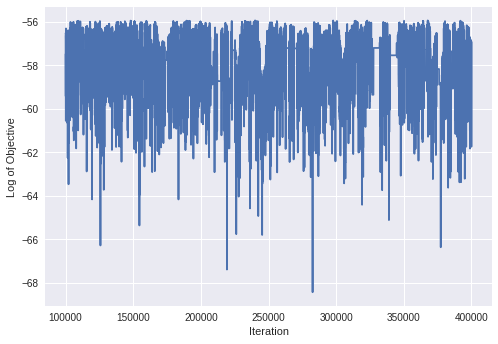

In [ ]:
burnin = 100000
plt.figure()
LorMCMC.Ana(start=burnin)
plt.savefig('VeroMod1_V2.png')


## Distribuciones posteriores marginales

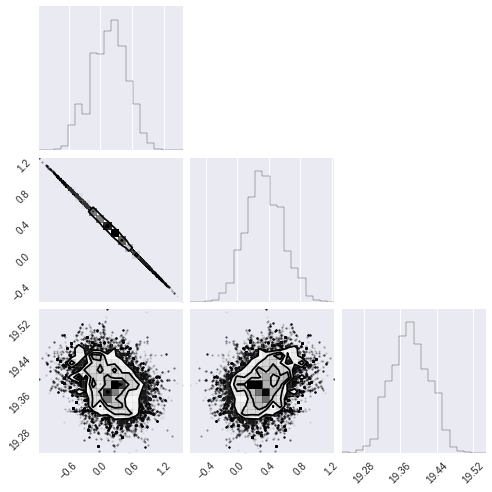

In [ ]:
corner.corner(LorMCMC.Output[burnin:,:-1])
plt.savefig('DistribucionesPosterioresMod1_V2.png')

### X(0)

La media posterior de x(0) es  0.16054238155363967
El límite inferior de la region de probabilidad para x(0) es  -0.5784112471143695
El límite superior de la region de probabilidad para x(0) es  0.7879605525173103


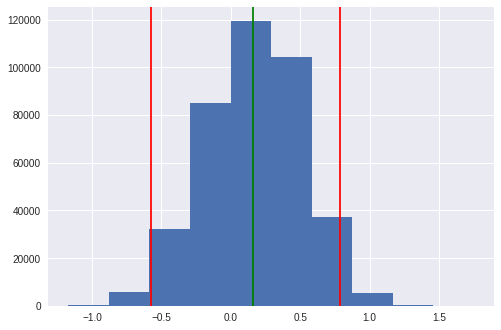

In [ ]:
#x(0)
x_0 = LorMCMC.Output[10000:, 0]
plt.hist(x_0)
plt.axvline(x = np.mean(x_0), color="green")
plt.axvline(x = np.percentile(x_0, 97.5), color="red")
plt.axvline(x = np.percentile(x_0, 2.5), color="red")
print("La media posterior de x(0) es", "",np.mean(x_0))
print("El límite inferior de la region de probabilidad para x(0) es", "", np.percentile(x_0, 2.5))
print("El límite superior de la region de probabilidad para x(0) es", "", np.percentile(x_0, 97.5))


### Y(0)

La media posterior de y(0) es  0.3418994286027706
El límite inferior de la region de probabilidad para y(0) es  -0.07789519310868664
El límite superior de la region de probabilidad para y(0) es  0.8362360745975008


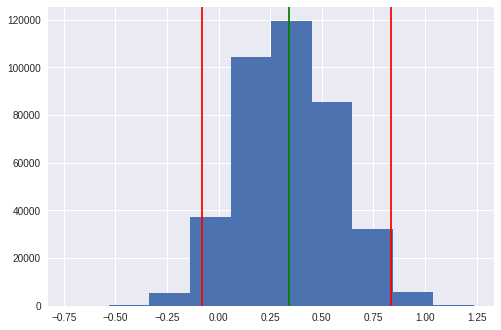

In [ ]:
#y(0)
y_0 = LorMCMC.Output[10000:, 1]
plt.hist(y_0)
plt.axvline(x = np.mean(y_0), color="green")
plt.axvline(x = np.percentile(y_0, 97.5), color="red")
plt.axvline(x = np.percentile(y_0, 2.5), color="red")
print("La media posterior de y(0) es", "",np.mean(y_0))
print("El límite inferior de la region de probabilidad para y(0) es", "", np.percentile(y_0, 2.5))
print("El límite superior de la region de probabilidad para y(0) es", "", np.percentile(y_0, 97.5))


### Z(0)

La media posterior de z(0) es  19.380403117940276
El límite inferior de la region de probabilidad para z(0) es  19.30675089480791
El límite superior de la region de probabilidad para z(0) es  19.45651407320386


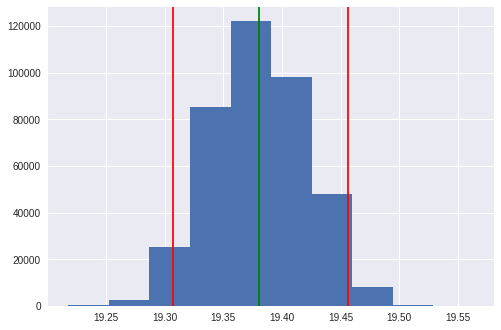

In [ ]:
#z(0)
z_0 = LorMCMC.Output[10000:, 2]
plt.hist(z_0)
plt.axvline(x = np.mean(z_0), color="green")
plt.axvline(x = np.percentile(z_0, 97.5), color="red")
plt.axvline(x = np.percentile(z_0, 2.5), color="red")
print("La media posterior de z(0) es", "",np.mean(z_0))
print("El límite inferior de la region de probabilidad para z(0) es", "", np.percentile(z_0, 2.5))
print("El límite superior de la region de probabilidad para z(0) es", "", np.percentile(z_0, 97.5))


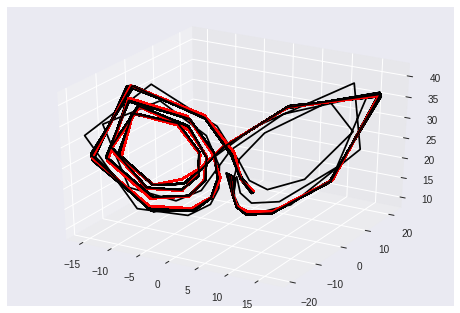

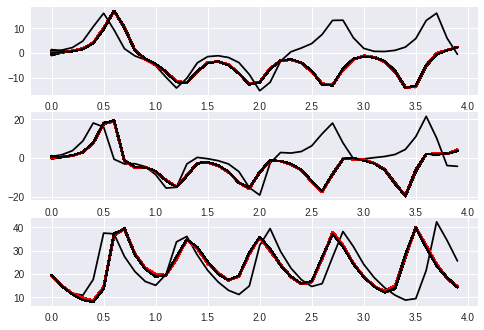

In [ ]:
ax = plt.figure().add_subplot(projection='3d')
fig, axs = plt.subplots(3)           
for k in np.arange(5000):
    soln = fm.simulate(LorMCMC.Output[-k*10,:-1])
    ax.plot(data[:, 0], data[:, 1], data[:, 2],'r') #data
    ax.plot(soln[:, 0], soln[:, 1], soln[:, 2],'k') #true
    axs[0].plot(fm.t_data,data[:,0],'r')
    axs[0].plot(fm.t_data,soln[:,0],'k')        
    axs[1].plot(fm.t_data,data[:,1],'r')
    axs[1].plot(fm.t_data,soln[:,1],'k')    
    axs[2].plot(fm.t_data,data[:,2],'r')
    axs[2].plot(fm.t_data,soln[:,2],'k')    
    #plt.savefig('samples_vs_data.png')

## Predicción

In [ ]:
fm.make_future_data(p=LorMCMC.Output[-3*10,:-1], t_i=40, t_f=80)[:,0]

array([  4.62190503,   9.63256608,  15.15255348,  10.72274596,
         3.28715906,   0.20309251,  -0.84837568,  -1.83008418,
        -3.94537774,  -8.77123667, -15.37366609, -11.91711458,
        -3.35783456,   0.43471235,   1.95923849,   3.76257084,
         7.45301486,  13.1641206 ,  13.31389019,   6.17413614,
         1.82601725,   0.5913408 ,   0.4959536 ,   0.90751259,
         2.08304711,   5.16481343,  12.11046214,  16.77672788,
         7.22705385,  -0.19844494,  -2.98823483,  -5.16510451,
        -8.67311659, -12.52560656, -11.31045863,  -6.3554154 ,
        -3.61840836,  -3.47448817,  -5.26018467,  -9.1643607 ])

In [ ]:
solnsx = np.zeros((5000,40))
solnsy = np.zeros((5000,40))
solnsz = np.zeros((5000,40))
for k in np.arange(5000):
    solnsx[k,:] = fm.make_future_data(p=LorMCMC.Output[-k,:-1], t_i=40, t_f=80)[:,0]
    solnsy[k,:] = fm.make_future_data(p=LorMCMC.Output[-k,:-1], t_i=40, t_f=80)[:,1]
    solnsz[k,:] = fm.make_future_data(p=LorMCMC.Output[-k,:-1], t_i=40, t_f=80)[:,2]
    


In [ ]:
fut_data = fm.future_data()

### X

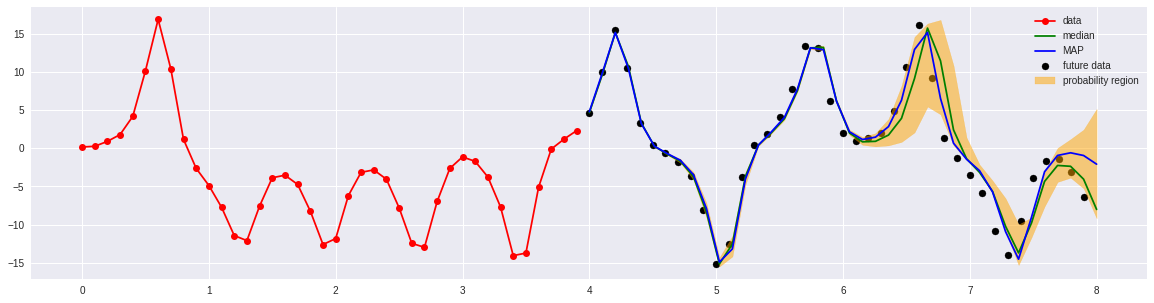

In [ ]:
fm = forward_mapping()
plt.figure(figsize=(20, 5))
# plot data
plt.plot(fm.t_data,data[:,0],'r-o',label='data')
#plot future data
plt.scatter(np.arange(4,8,0.1),fut_data[40:80,0], marker="o", color="k", label='future data')
# find and plot the median
median_soln = np.median(solnsx,axis=0)
plt.plot(np.linspace(4,8,40),median_soln,'g',label='median')
# find quantiles and plot probability region
q1 = np.quantile(solnsx,0.05,axis=0)
q2 = np.quantile(solnsx,0.95,axis=0)
plt.fill_between(np.linspace(4,8,40),q1,q2,color='orange',label='probability region', alpha=0.5)
#find and plot the MAP
qq = LorMCMC.Output[LorMCMC.Output[burnin:,0].argsort()]
my_solnx = fm.make_future_data(p=qq[0,(0,1,2)], t_i=40, t_f=80)[:,0]
plt.plot(np.linspace(4,8,40),my_solnx,'b',label='MAP')
plt.legend(loc=0, shadow=True)
plt.savefig('PredXMod1_V2.png')

### Y

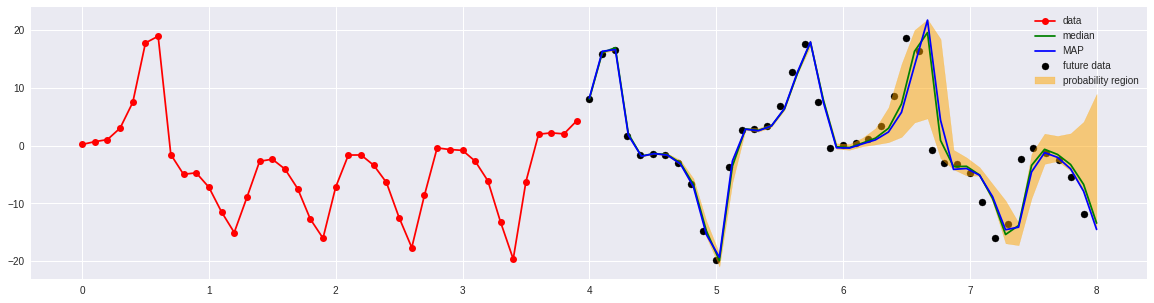

In [ ]:
plt.figure(figsize=(20, 5))
# plot data
plt.plot(fm.t_data,data[:,1],'r-o',label='data')
#plot future data
plt.scatter(np.arange(4,8,0.1),fut_data[40:80,1], marker="o", color="k", label='future data')
# find and plot the median
median_soln = np.median(solnsy,axis=0)
plt.plot(np.linspace(4,8,40),median_soln,'g',label='median')
# find quantiles and plot probability region
q1 = np.quantile(solnsy,0.05,axis=0)
q2 = np.quantile(solnsy,0.95,axis=0)
plt.fill_between(np.linspace(4,8,40),q1,q2,color='orange',label='probability region', alpha=0.5)
#find and plot the MAP
qq = LorMCMC.Output[LorMCMC.Output[burnin:,1].argsort()]
my_solny = fm.make_future_data(p=qq[0,(0,1,2)], t_i=40, t_f=80)[:,1]
plt.plot(np.linspace(4,8,40),my_solny,'b',label='MAP')
plt.legend(loc=0, shadow=True)
plt.savefig('PredYMod1_V2.png')

### Z

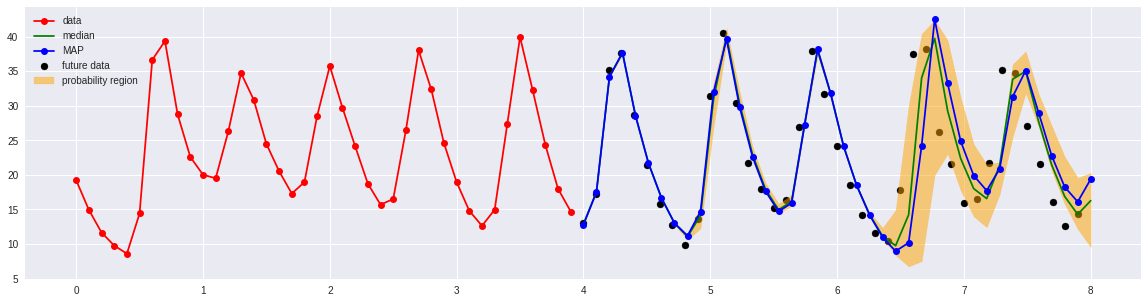

In [ ]:
plt.figure(figsize=(20, 5))
# plot data
plt.plot(fm.t_data,data[:,2],'r-o',label='data')
#plot future data
plt.scatter(np.arange(4,8,0.1),fut_data[40:80,2], marker="o", color="k", label='future data')
# find and plot the median
median_soln = np.median(solnsz,axis=0)
plt.plot(np.linspace(4,8,40),median_soln,'g',label='median')
# find quantiles and plot probability region
q1 = np.quantile(solnsz,0.05,axis=0)
q2 = np.quantile(solnsz,0.95,axis=0)
plt.fill_between(np.linspace(4,8,40),q1,q2,color='orange',label='probability region', alpha=0.5)
#find and plot the MAP
qq = LorMCMC.Output[LorMCMC.Output[burnin:,2].argsort()]
my_solnz = fm.make_future_data(p=qq[0,(0,1,2)], t_i=40, t_f=80)[:,2]
plt.plot(np.linspace(4,8,40),my_solnz,'b-o',label='MAP')
plt.legend(loc=0, shadow=True)
plt.savefig('PredZMod1_V2.png')

In [ ]:
fm.make_future_data(p=qq[0,(0,1,2)], t_i=40, t_f=41)[:,0]

array([4.62842724])

In [ ]:
sim_x2 = np.zeros((5000,1))
for k in np.arange(5000):
    sim_x2[k,:] = fm.make_future_data(p=qq[-k,(0,1,2)], t_i=40, t_f=41)[:,0]

In [ ]:
mux2 =np.mean(sim_x2)
sigmax2 = np.std(sim_x2)

In [ ]:
sim_y2 = np.zeros((5000,1))
sim_z2 = np.zeros((5000,1))
for k in np.arange(5000):
    sim_y2[k,:] = fm.make_future_data(p=qq[-k,(0,1,2)], t_i=40, t_f=41)[:,1]
    sim_z2[k,:] = fm.make_future_data(p=qq[-k,(0,1,2)], t_i=40, t_f=41)[:,2]

In [ ]:
muy2 =np.mean(sim_y2)
sigmay2 = np.std(sim_y2)
muz2 =np.mean(sim_z2)
sigmaz2 = np.std(sim_z2)

In [ ]:
print(mux2)
print(sigmax2)

4.5594455549825605
1.481419604143541


In [ ]:
print(muy2)
print(sigmay2)

8.02239489561937
1.815190457994695


In [ ]:
print(muz2)
print(sigmaz2)

13.01018342418434
1.6542533543613411


# Modelo Bayesiano 2
Empezar en 4 y 8, terminar en 12

In [ ]:
random.seed(2021)
fm = forward_mapping()
data2 = fm.make_data()[40:80,:]
    

In [ ]:
print(data2.shape)
print(data2)

(40, 3)
[[ 4.51056267e+00  8.33650453e+00  1.32256607e+01]
 [ 9.62042083e+00  1.63437134e+01  1.78097263e+01]
 [ 1.50288696e+01  1.69493426e+01  3.41559354e+01]
 [ 1.04402772e+01  1.92702928e+00  3.78555318e+01]
 [ 3.67492233e+00 -2.11276361e+00  2.85589098e+01]
 [ 4.16089386e-01 -1.49917886e+00  2.18157459e+01]
 [-6.10006027e-01 -1.37613187e+00  1.61958837e+01]
 [-1.57178223e+00 -3.10285235e+00  1.26731276e+01]
 [-3.80559659e+00 -6.71247781e+00  1.09885802e+01]
 [-8.24786924e+00 -1.48853261e+01  1.32925694e+01]
 [-1.50896896e+01 -2.00282813e+01  3.09638597e+01]
 [-1.28314421e+01 -3.47802292e+00  4.00021167e+01]
 [-3.64094795e+00  2.93553529e+00  3.10576484e+01]
 [ 5.91447379e-01  2.74363215e+00  2.34273613e+01]
 [ 1.90167036e+00  3.53357104e+00  1.85118544e+01]
 [ 3.90520412e+00  6.36277053e+00  1.49459091e+01]
 [ 7.80814820e+00  1.26246339e+01  1.58220595e+01]
 [ 1.32136249e+01  1.76443646e+01  2.71249553e+01]
 [ 1.31431813e+01  7.65676243e+00  3.73379316e+01]
 [ 6.37805432e+00 -4.33

In [ ]:
if __name__=="__main__":
    
    # inicializa la clase
    
    def lprior(p):
        mu = np.array([4.5594455549825605,8.02239489561937,13.01018342418434])
        cov = np.diag([1.481419604143541,1.815190457994695,1.6542533543613411])
        return ss.multivariate_normal.logpdf(p,mean=mu,cov=cov)
    
    def llikelihood(p):
        soln = fm.simulate(p)
        cov = np.diag((soln.max(axis=0)**2+1)/10.0**2)
        return np.sum(ss.multivariate_normal.logpdf(data2-soln,mean=np.zeros(3),cov=cov))
        
    def energy(p):
        fx = -lprior(p) - llikelihood(p)
        return fx

    def support(p):
        """ soporte de los parametros """
        rt = True
        rt &= (-40.0 < p[0] < 40.0)
        rt &= (-50.0 < p[1] < 50.0)
        rt &= (-10.0 < p[2] < 60.0)
        return rt

    def init():
        """ inicializacion de los parametros """
        p = np.zeros(3)
        p[0] = np.random.uniform(low=4.5,high=4.8)
        p[1] = np.random.uniform(low=8.0,high=8.3)
        p[2] = np.random.uniform(low=12.8,high=13.1)
        return p
    

In [ ]:
random.seed(2021)
# haz una cadema de Markov con el twalk
LorMCMC = pytwalk(n=3,U=energy,Supp=support)
LorMCMC.Run(T=400000,x0=init(),xp0=init())

pytwalk: Running the twalk with 400000 iterations .  Wed, 01 Dec 2021, 19:28:39.
       Finish by Wed, 01 Dec 2021, 20:33.
pytwalk:       6144 iterations so far. Finish by Wed, 01 Dec 2021, 20:07.
pytwalk:      17408 iterations so far. Finish by Wed, 01 Dec 2021, 20:07.
pytwalk:      38912 iterations so far. Finish by Wed, 01 Dec 2021, 20:07.
pytwalk:      80896 iterations so far. Finish by Wed, 01 Dec 2021, 20:07.
pytwalk:     163840 iterations so far. Finish by Wed, 01 Dec 2021, 20:07.
pytwalk:     329728 iterations so far. Finish by Wed, 01 Dec 2021, 20:07.
pytwalk: finished, Wed, 01 Dec 2021, 20:07:16.


1

## Funcion objetivo

Acceptance rates for the Walk, Traverse, Blow and Hop kernels:[0.06675211 0.09364679 0.01295139 0.        ]
Global acceptance rate: 0.07910
AutoMaxlag: maxlag= 2343.
Integrated Autocorrelation Time:   633.5, IAT/n:   211.2


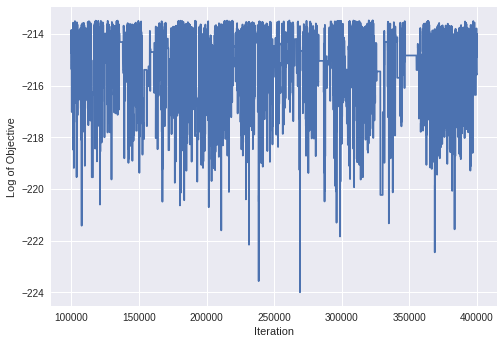

In [ ]:
burnin = 100000
plt.figure()
LorMCMC.Ana(start=burnin)
plt.savefig('VeroMod2_V2.png')

## Distribuciones posteriores marginales

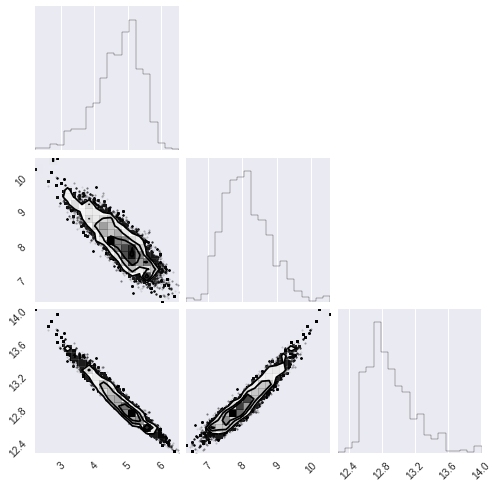

In [ ]:
corner.corner(LorMCMC.Output[burnin:,:-1])
plt.savefig('DistribucionesPosterioresMod2_V2.png')

### X(0)

La media posterior de x(0) es  4.719571114328631
El límite inferior de la region de probabilidad para x(0) es  3.1312834561894736
El límite superior de la region de probabilidad para x(0) es  5.713433343876011


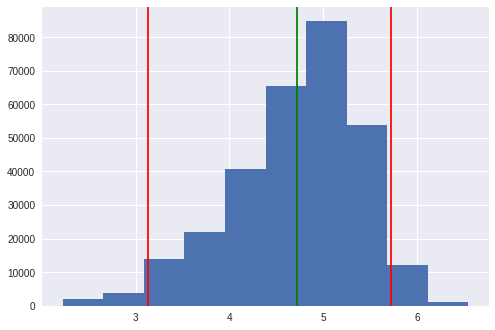

In [ ]:
#x(0)
x_0 = LorMCMC.Output[100000:, 0]
plt.hist(x_0)
plt.axvline(x = np.mean(x_0), color="green")
plt.axvline(x = np.percentile(x_0, 97.5), color="red")
plt.axvline(x = np.percentile(x_0, 2.5), color="red")
print("La media posterior de x(0) es", "",np.mean(x_0))
print("El límite inferior de la region de probabilidad para x(0) es", "", np.percentile(x_0, 2.5))
print("El límite superior de la region de probabilidad para x(0) es", "", np.percentile(x_0, 97.5))


### Y(0)

La media posterior de y(0) es  8.11488020012758
El límite inferior de la region de probabilidad para y(0) es  7.107997614525909
El límite superior de la region de probabilidad para y(0) es  9.51246146734473


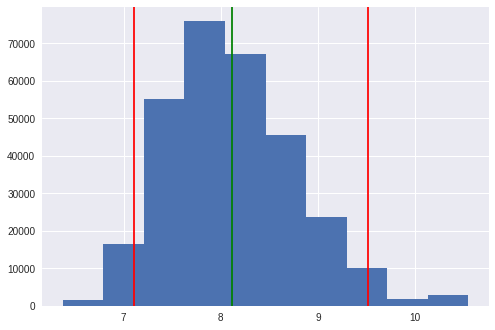

In [ ]:
#y(0)
y_0 = LorMCMC.Output[100000:, 1]
plt.hist(y_0)
plt.axvline(x = np.mean(y_0), color="green")
plt.axvline(x = np.percentile(y_0, 97.5), color="red")
plt.axvline(x = np.percentile(y_0, 2.5), color="red")
print("La media posterior de y(0) es", "",np.mean(y_0))
print("El límite inferior de la region de probabilidad para y(0) es", "", np.percentile(y_0, 2.5))
print("El límite superior de la region de probabilidad para y(0) es", "", np.percentile(y_0, 97.5))


### Z(0)

La media posterior de z(0) es  12.90182903782823
El límite inferior de la region de probabilidad para z(0) es  12.528371570406543
El límite superior de la region de probabilidad para z(0) es  13.554366117658532


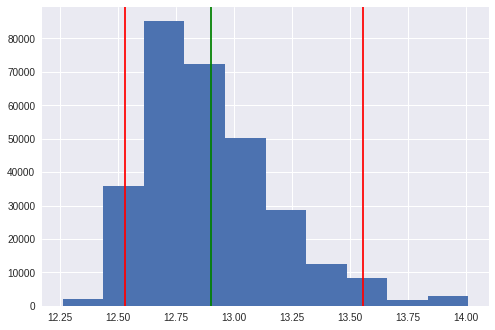

In [ ]:
#z(0)
z_0 = LorMCMC.Output[100000:, 2]
plt.hist(z_0)
plt.axvline(x = np.mean(z_0), color="green")
plt.axvline(x = np.percentile(z_0, 97.5), color="red")
plt.axvline(x = np.percentile(z_0, 2.5), color="red")
print("La media posterior de z(0) es", "",np.mean(z_0))
print("El límite inferior de la region de probabilidad para z(0) es", "", np.percentile(z_0, 2.5))
print("El límite superior de la region de probabilidad para z(0) es", "", np.percentile(z_0, 97.5))


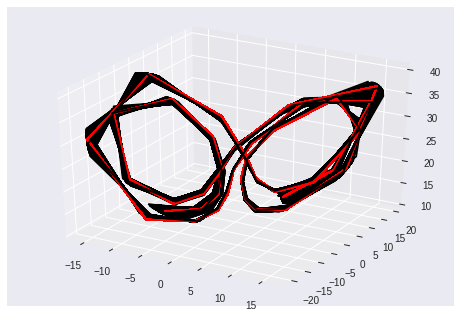

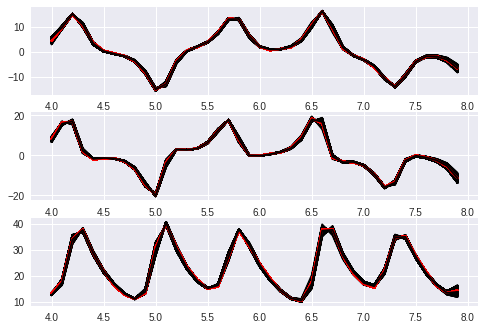

In [ ]:
ax = plt.figure().add_subplot(projection='3d')
fig, axs = plt.subplots(3)           
for k in np.arange(5000):
    soln = fm.simulate(LorMCMC.Output[-k*10,:-1])
    ax.plot(data2[:, 0], data2[:, 1], data2[:, 2],'r') #data
    ax.plot(soln[:, 0], soln[:, 1], soln[:, 2],'k') #true
    axs[0].plot(np.arange(4.0, 8.0, 0.1),data2[:,0],'r')
    axs[0].plot(np.arange(4.0, 8.0, 0.1),soln[:,0],'k')        
    axs[1].plot(np.arange(4.0, 8.0, 0.1),data2[:,1],'r')
    axs[1].plot(np.arange(4.0, 8.0, 0.1),soln[:,1],'k')    
    axs[2].plot(np.arange(4.0, 8.0, 0.1),data2[:,2],'r')
    axs[2].plot(np.arange(4.0, 8.0, 0.1),soln[:,2],'k')    
    #plt.savefig('samples_vs_data.png')

## Predicción

In [ ]:
fm.make_future_data(p=LorMCMC.Output[-3*10,:-1], t_i=40, t_f=80)[:,0]

array([-1.37091913e+01, -1.31343462e+01, -5.50456309e+00, -1.26542158e+00,
        2.67938247e-03,  4.59485647e-01,  1.04229682e+00,  2.44451564e+00,
        6.04682936e+00,  1.35299725e+01,  1.58579675e+01,  5.54956411e+00,
       -7.68285054e-01, -3.20290225e+00, -5.48728728e+00, -9.25526368e+00,
       -1.28660744e+01, -1.07219731e+01, -5.72470489e+00, -3.34716759e+00,
       -3.44309007e+00, -5.43464578e+00, -9.58893605e+00, -1.35624806e+01,
       -1.05490651e+01, -4.91394587e+00, -2.46303474e+00, -2.40086347e+00,
       -3.94661639e+00, -7.68306339e+00, -1.33405780e+01, -1.30593211e+01,
       -5.93346278e+00, -1.77882786e+00, -6.39279382e-01, -6.15289165e-01,
       -1.16501103e+00, -2.68354279e+00, -6.56969856e+00, -1.41831660e+01])

In [ ]:
solnsx = np.zeros((5000,40))
solnsy = np.zeros((5000,40))
solnsz = np.zeros((5000,40))
for k in np.arange(5000):
    solnsx[k,:] = fm.make_future_data(p=LorMCMC.Output[-k,:-1], t_i=40, t_f=80)[:,0]
    solnsy[k,:] = fm.make_future_data(p=LorMCMC.Output[-k,:-1], t_i=40, t_f=80)[:,1]
    solnsz[k,:] = fm.make_future_data(p=LorMCMC.Output[-k,:-1], t_i=40, t_f=80)[:,2]
    


In [ ]:
fut_data = fm.future_data()

### X

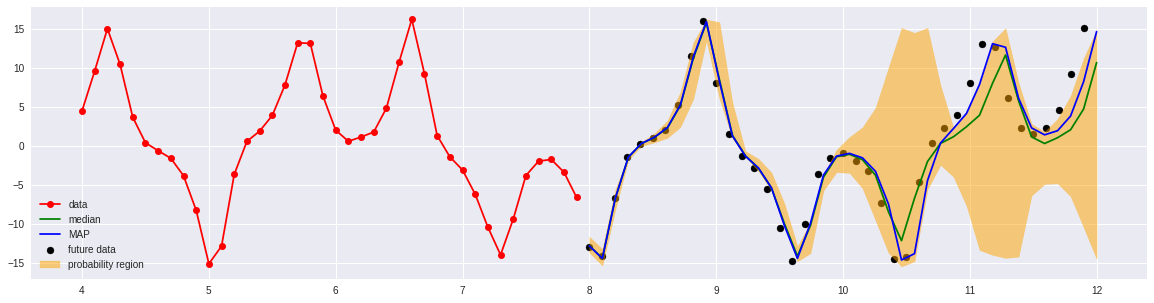

In [ ]:
plt.figure(figsize=(20, 5))
# plot data
plt.plot(np.arange(4.0, 8.0, 0.1),data2[:,0],'r-o',label='data')
#plot future data
plt.scatter(np.arange(8,12,0.1),fut_data[80:120,0], marker="o", color="k", label='future data')
# find and plot the median
median_soln = np.median(solnsx,axis=0)
plt.plot(np.linspace(8,12,40),median_soln,'g',label='median')
# find quantiles and plot probability region
q1 = np.quantile(solnsx,0.05,axis=0)
q2 = np.quantile(solnsx,0.95,axis=0)
plt.fill_between(np.linspace(8,12,40),q1,q2,color='orange',label='probability region', alpha=0.5)
#find and plot the MAP
qq = LorMCMC.Output[LorMCMC.Output[burnin:,0].argsort()]
my_solnx = fm.make_future_data(p=qq[0,(0,1,2)], t_i=40, t_f=80)[:,0]
plt.plot(np.linspace(8,12,40),my_solnx,'b',label='MAP')
plt.legend(loc=0, shadow=True)
plt.savefig('PredXMod2_V2.png')

### Y

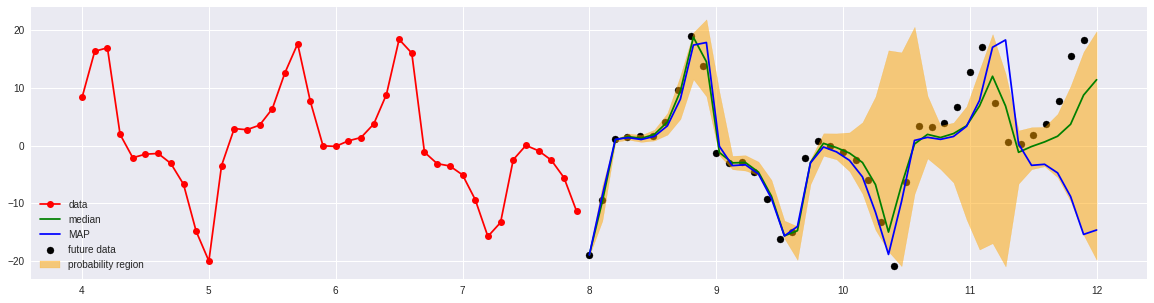

In [ ]:
plt.figure(figsize=(20, 5))
# plot data
plt.plot(np.arange(4.0, 8.0, 0.1),data2[:,1],'r-o',label='data')
#plot future data
plt.scatter(np.arange(8,12,0.1),fut_data[80:120,1], marker="o", color="k", label='future data')
# find and plot the median
median_soln = np.median(solnsy,axis=0)
plt.plot(np.linspace(8,12,40),median_soln,'g',label='median')
# find quantiles and plot probability region
q1 = np.quantile(solnsy,0.05,axis=0)
q2 = np.quantile(solnsy,0.95,axis=0)
plt.fill_between(np.linspace(8,12,40),q1,q2,color='orange',label='probability region', alpha=0.5)
#find and plot the MAP
qq = LorMCMC.Output[LorMCMC.Output[burnin:,1].argsort()]
my_solny = fm.make_future_data(p=qq[0,(0,1,2)], t_i=40, t_f=80)[:,1]
plt.plot(np.linspace(8,12,40),my_solny,'b',label='MAP')
plt.legend(loc=0, shadow=True)
plt.savefig('PredYMod2_V2.png')

### Z

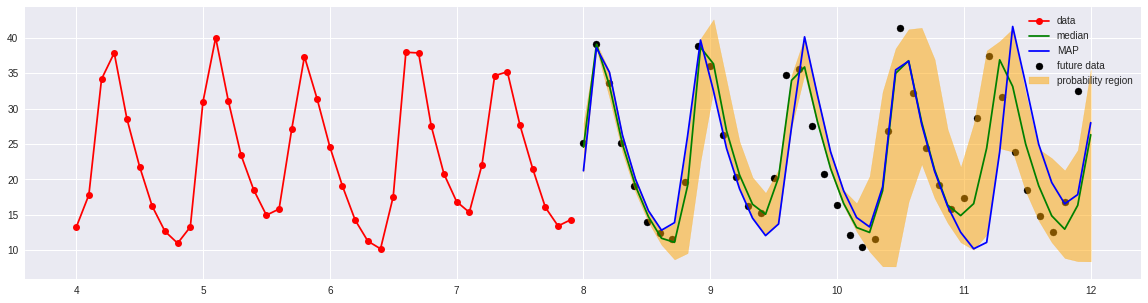

In [ ]:
plt.figure(figsize=(20, 5))
# plot data
plt.plot(np.arange(4.0, 8.0, 0.1),data2[:,2],'r-o',label='data')
#plot future data
plt.scatter(np.arange(8,12,0.1),fut_data[80:120,2], marker="o", color="k", label='future data')
# find and plot the median
median_soln = np.median(solnsz,axis=0)
plt.plot(np.linspace(8,12,40),median_soln,'g',label='median')
# find quantiles and plot probability region
q1 = np.quantile(solnsz,0.05,axis=0)
q2 = np.quantile(solnsz,0.95,axis=0)
plt.fill_between(np.linspace(8,12,40),q1,q2,color='orange',label='probability region', alpha=0.5)
#find and plot the MAP
qq = LorMCMC.Output[LorMCMC.Output[burnin:,2].argsort()]
my_solnz = fm.make_future_data(p=qq[0,(0,1,2)], t_i=40, t_f=80)[:,2]
plt.plot(np.linspace(8,12,40),my_solnz,'b',label='MAP')
plt.legend(loc=0, shadow=True)
plt.savefig('PredZMod2_V2.png')

In [ ]:
fm.make_future_data(p=qq[0,(0,1,2)], t_i=40, t_f=41)[:,0]

array([-11.73050391])

In [ ]:
sim_x2 = np.zeros((5000,1))
for k in np.arange(5000):
    sim_x2[k,:] = fm.make_future_data(p=qq[-k,(0,1,2)], t_i=40, t_f=41)[:,0]

In [ ]:
mux2 =np.mean(sim_x2)
sigmax2 = np.std(sim_x2)

In [ ]:
sim_y2 = np.zeros((5000,1))
sim_z2 = np.zeros((5000,1))
for k in np.arange(5000):
    sim_y2[k,:] = fm.make_future_data(p=qq[-k,(0,1,2)], t_i=40, t_f=41)[:,1]
    sim_z2[k,:] = fm.make_future_data(p=qq[-k,(0,1,2)], t_i=40, t_f=41)[:,2]

In [ ]:
muy2 =np.mean(sim_y2)
sigmay2 = np.std(sim_y2)
muz2 =np.mean(sim_z2)
sigmaz2 = np.std(sim_z2)

In [ ]:
print(mux2)
print(sigmax2)

-12.828612931350005
0.44380625365324655


In [ ]:
print(muy2)
print(sigmay2)

-18.953182871610164
0.14163784321809272


In [ ]:
print(muz2)
print(sigmaz2)

24.754554966483738
1.5785009674321593


# Modelo Bayesiano 3
Datos entre 8 y 12, predicción en 16

In [ ]:
random.seed(2021)
fm = forward_mapping()
data3 = fm.make_data()[80:120,:]
    

In [ ]:
print(data3.shape)
print(data3)

(40, 3)
[[-13.07201741 -18.99346812  23.9813205 ]
 [-14.4337704   -9.4325182   38.99652746]
 [ -6.74152751   1.17717612  33.54167408]
 [ -1.76352765   1.48296187  25.45266125]
 [  0.09953292   1.28093592  18.75029743]
 [  1.31828941   1.88374118  14.09721942]
 [  2.58537033   4.34100513  11.97127001]
 [  5.3526056    9.64140162  11.02262041]
 [ 11.47005444  19.08271794  19.66913222]
 [ 16.02376064  13.93574421  39.30702281]
 [  8.3849914   -1.15254477  35.45947468]
 [  1.23679671  -2.66592683  27.1044569 ]
 [ -0.98889601  -3.16117742  20.7507297 ]
 [ -2.58998084  -4.5324795   16.27768354]
 [ -5.41277466  -8.98505962  14.70765372]
 [-10.19069835 -16.25332177  20.1660856 ]
 [-14.51573709 -14.69350688  35.53237147]
 [ -9.65070857  -2.42614641  36.29559078]
 [ -3.8758562    0.48609746  27.88662114]
 [ -1.20907429  -0.25752894  21.52886319]
 [ -0.78468178  -1.36700341  15.45852529]
 [ -1.46336406  -2.02933919  12.69115066]
 [ -3.05270308  -5.75060274  10.7919861 ]
 [ -6.94888872 -12.9974900

In [ ]:
if __name__=="__main__":
    
    # inicializa la clase
    
    def lprior(p):
        mu = np.array([-12.828612931350005,-18.953182871610164,24.754554966483738])
        cov = np.diag([0.44380625365324655,0.14163784321809272,1.5785009674321593])
        return ss.multivariate_normal.logpdf(p,mean=mu,cov=cov)
    
    def llikelihood(p):
        soln = fm.simulate(p)
        cov = np.diag((soln.max(axis=0)**2+1)/10.0**2)
        return np.sum(ss.multivariate_normal.logpdf(data3-soln,mean=np.zeros(3),cov=cov))
        
    def energy(p):
        fx = -lprior(p) - llikelihood(p)
        return fx

    def support(p):
        """ soporte de los parametros """
        rt = True
        rt &= (-40.0 < p[0] < 40.0)
        rt &= (-50.0 < p[1] < 50.0)
        rt &= (-10.0 < p[2] < 60.0)
        return rt

    def init():
        """ inicializacion de los parametros """
        p = np.zeros(3)
        p[0] = np.random.uniform(low=-14.0,high=-12.0)
        p[1] = np.random.uniform(low=-10.0,high=-8.0)
        p[2] = np.random.uniform(low=37.7,high=40.0)
        return p
    

In [ ]:
random.seed(2021)
# haz una cadema de Markov con el twalk
LorMCMC = pytwalk(n=3,U=energy,Supp=support)
LorMCMC.Run(T=400000,x0=init(),xp0=init())

pytwalk: Running the twalk with 400000 iterations .  Wed, 01 Dec 2021, 21:59:16.
       Finish by Wed, 01 Dec 2021, 22:57.
pytwalk:       6144 iterations so far. Finish by Wed, 01 Dec 2021, 22:37.
pytwalk:      17408 iterations so far. Finish by Wed, 01 Dec 2021, 22:37.
pytwalk:      38912 iterations so far. Finish by Wed, 01 Dec 2021, 22:37.
pytwalk:      80896 iterations so far. Finish by Wed, 01 Dec 2021, 22:37.
pytwalk:     164864 iterations so far. Finish by Wed, 01 Dec 2021, 22:37.
pytwalk:     331776 iterations so far. Finish by Wed, 01 Dec 2021, 22:37.
pytwalk: finished, Wed, 01 Dec 2021, 22:37:40.


1

Acceptance rates for the Walk, Traverse, Blow and Hop kernels:[0.03461627 0.08812395 0.00616171 0.        ]
Global acceptance rate: 0.06047
AutoMaxlag: maxlag= 2268.
Integrated Autocorrelation Time:   530.8, IAT/n:   176.9


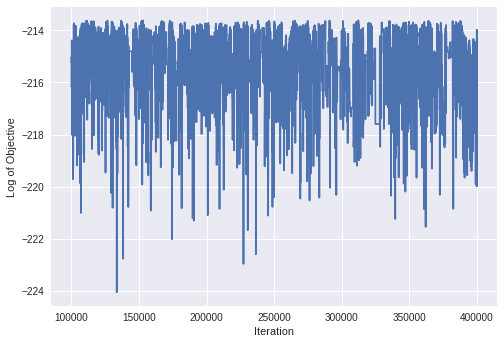

In [ ]:
burnin = 100000
plt.figure()
LorMCMC.Ana(start=burnin)
plt.savefig('VeroMod3_V2.png')

## Distribuciones posteriores marginales

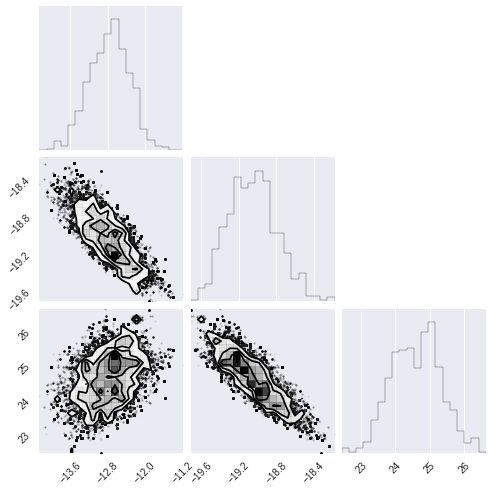

In [ ]:
corner.corner(LorMCMC.Output[burnin:,:-1])
plt.savefig('DistribucionesPosterioresMod3_V2.png')

### X(0)

La media posterior de x(0) es  -12.764962732686373
El límite inferior de la region de probabilidad para x(0) es  -13.610020145583107
El límite superior de la region de probabilidad para x(0) es  -11.998349717742885


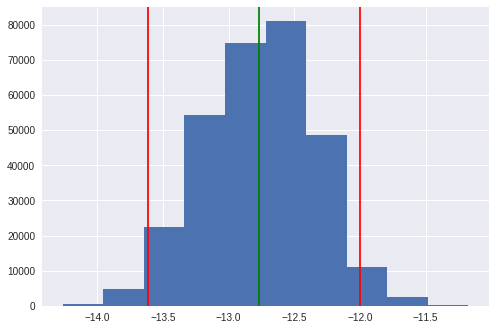

In [ ]:
#x(0)
x_0 = LorMCMC.Output[100000:, 0]
plt.hist(x_0)
plt.axvline(x = np.mean(x_0), color="green")
plt.axvline(x = np.percentile(x_0, 97.5), color="red")
plt.axvline(x = np.percentile(x_0, 2.5), color="red")
print("La media posterior de x(0) es", "",np.mean(x_0))
print("El límite inferior de la region de probabilidad para x(0) es", "", np.percentile(x_0, 2.5))
print("El límite superior de la region de probabilidad para x(0) es", "", np.percentile(x_0, 97.5))


### Y(0)

La media posterior de y(0) es  -19.048661611187523
El límite inferior de la region de probabilidad para y(0) es  -19.487556534856587
El límite superior de la region de probabilidad para y(0) es  -18.514902996572328


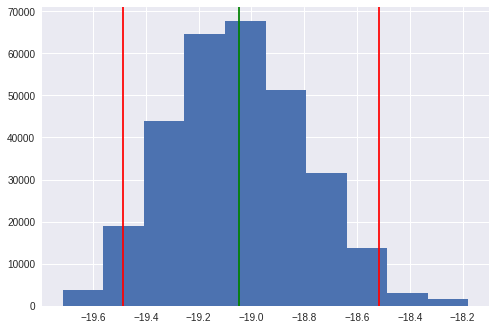

In [ ]:
#y(0)
y_0 = LorMCMC.Output[100000:, 1]
plt.hist(y_0)
plt.axvline(x = np.mean(y_0), color="green")
plt.axvline(x = np.percentile(y_0, 97.5), color="red")
plt.axvline(x = np.percentile(y_0, 2.5), color="red")
print("La media posterior de y(0) es", "",np.mean(y_0))
print("El límite inferior de la region de probabilidad para y(0) es", "", np.percentile(y_0, 2.5))
print("El límite superior de la region de probabilidad para y(0) es", "", np.percentile(y_0, 97.5))


### Z(0)

La media posterior de z(0) es  24.612181927385226
El límite inferior de la region de probabilidad para z(0) es  23.329305784166344
El límite superior de la region de probabilidad para z(0) es  25.99423196918008


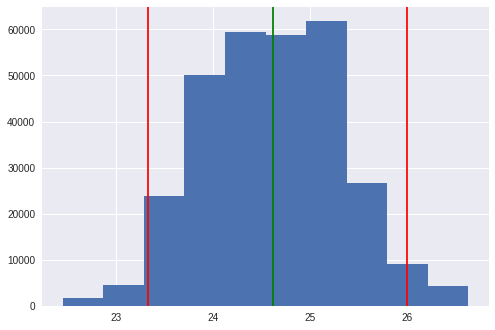

In [ ]:
#z(0)
z_0 = LorMCMC.Output[100000:, 2]
plt.hist(z_0)
plt.axvline(x = np.mean(z_0), color="green")
plt.axvline(x = np.percentile(z_0, 97.5), color="red")
plt.axvline(x = np.percentile(z_0, 2.5), color="red")
print("La media posterior de z(0) es", "",np.mean(z_0))
print("El límite inferior de la region de probabilidad para z(0) es", "", np.percentile(z_0, 2.5))
print("El límite superior de la region de probabilidad para z(0) es", "", np.percentile(z_0, 97.5))


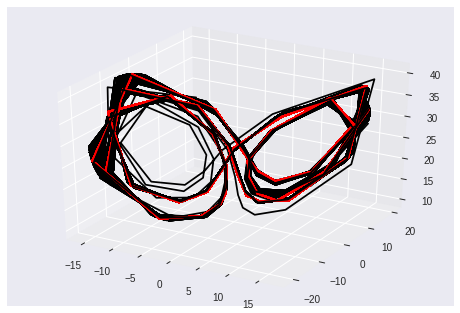

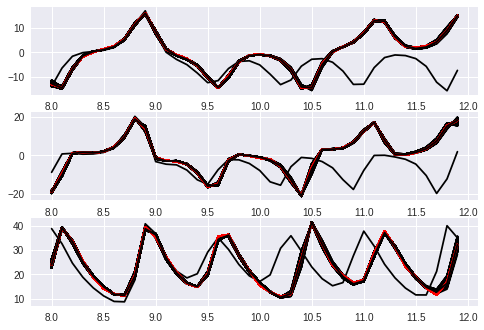

In [ ]:
ax = plt.figure().add_subplot(projection='3d')
fig, axs = plt.subplots(3)           
for k in np.arange(5000):
    soln = fm.simulate(LorMCMC.Output[-k*10,:-1])
    ax.plot(data3[:, 0], data3[:, 1], data3[:, 2],'r') #data
    ax.plot(soln[:, 0], soln[:, 1], soln[:, 2],'k') #true
    axs[0].plot(np.arange(8.0, 12.0, 0.1),data3[:,0],'r')
    axs[0].plot(np.arange(8.0, 12.0, 0.1),soln[:,0],'k')        
    axs[1].plot(np.arange(8.0, 12.0, 0.1),data3[:,1],'r')
    axs[1].plot(np.arange(8.0, 12.0, 0.1),soln[:,1],'k')    
    axs[2].plot(np.arange(8.0, 12.0, 0.1),data3[:,2],'r')
    axs[2].plot(np.arange(8.0, 12.0, 0.1),soln[:,2],'k')    
    #plt.savefig('samples_vs_data.png')

## Predicción

In [ ]:
fm.make_future_data(p=LorMCMC.Output[-3*10,:-1], t_i=40, t_f=80)[:,0]

array([ 10.89054982,   3.48749674,   0.3667272 ,  -0.6413949 ,
        -1.45759415,  -3.16802894,  -7.24819094, -14.3396901 ,
       -14.05218369,  -4.75623778,   0.21045229,   2.08932235,
         3.93038095,   7.48347216,  12.81909968,  13.09993156,
         6.55227896,   2.37627689,   1.29093495,   1.63770512,
         3.1702325 ,   6.91922327,  13.56268598,  14.33485074,
         5.72518812,   0.57794247,  -1.22482017,  -2.55970507,
        -5.12140579, -10.27222153, -14.95639781,  -9.87185044,
        -3.13721087,  -0.51213918,   0.23463321,   0.67711641,
         1.52723878,   3.6883218 ,   9.00779069,  16.53444528])

In [ ]:
solnsx = np.zeros((5000,40))
solnsy = np.zeros((5000,40))
solnsz = np.zeros((5000,40))
for k in np.arange(5000):
    solnsx[k,:] = fm.make_future_data(p=LorMCMC.Output[-k,:-1], t_i=40, t_f=80)[:,0]
    solnsy[k,:] = fm.make_future_data(p=LorMCMC.Output[-k,:-1], t_i=40, t_f=80)[:,1]
    solnsz[k,:] = fm.make_future_data(p=LorMCMC.Output[-k,:-1], t_i=40, t_f=80)[:,2]
    


In [ ]:
fm = forward_mapping()
fut_data = fm.future_data()

### X

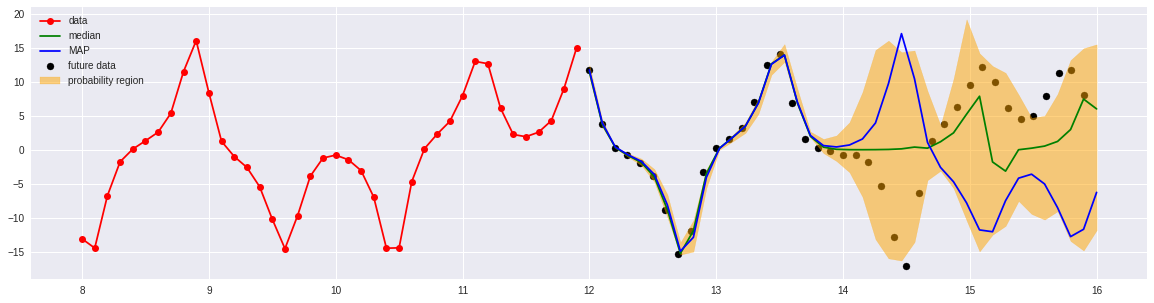

In [ ]:
plt.figure(figsize=(20, 5))
# plot data
plt.plot(np.arange(8.0, 12.0, 0.1),data3[:,0],'r-o',label='data')
#plot future data
plt.scatter(np.arange(12,16,0.1),fut_data[120:160,0], marker="o", color="k", label='future data')
# find and plot the median
median_soln = np.median(solnsx,axis=0)
plt.plot(np.linspace(12,16,40),median_soln,'g',label='median')
# find quantiles and plot probability region
q1 = np.quantile(solnsx,0.05,axis=0)
q2 = np.quantile(solnsx,0.95,axis=0)
plt.fill_between(np.linspace(12,16,40),q1,q2,color='orange',label='probability region', alpha=0.5)
#find and plot the MAP
qq = LorMCMC.Output[LorMCMC.Output[burnin:,0].argsort()]
my_solnx = fm.make_future_data(p=qq[0,(0,1,2)], t_i=40, t_f=80)[:,0]
plt.plot(np.linspace(12,16,40),my_solnx,'b',label='MAP')
plt.legend(loc=0, shadow=True)
plt.savefig('PredXMod3_V2.png')

### Y

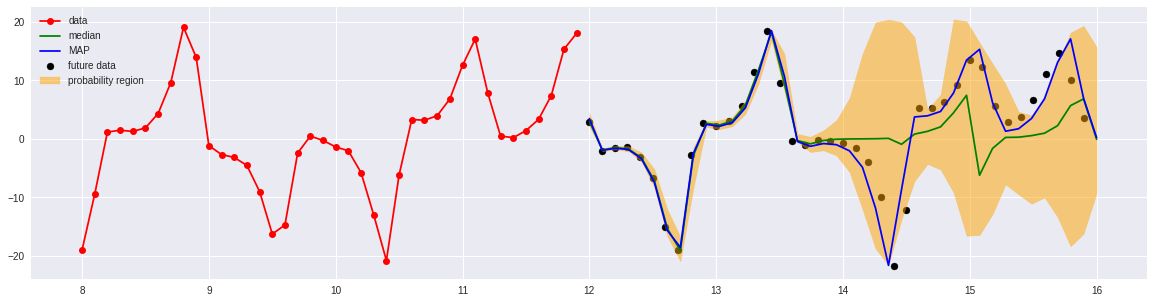

In [ ]:
plt.figure(figsize=(20, 5))
# plot data
plt.plot(np.arange(8.0, 12.0, 0.1),data3[:,1],'r-o',label='data')
#plot future data
plt.scatter(np.arange(12,16,0.1),fut_data[120:160,1], marker="o", color="k", label='future data')
# find and plot the median
median_soln = np.median(solnsy,axis=0)
plt.plot(np.linspace(12,16,40),median_soln,'g',label='median')
# find quantiles and plot probability region
q1 = np.quantile(solnsy,0.05,axis=0)
q2 = np.quantile(solnsy,0.95,axis=0)
plt.fill_between(np.linspace(12,16,40),q1,q2,color='orange',label='probability region', alpha=0.5)
#find and plot the MAP
qq = LorMCMC.Output[LorMCMC.Output[burnin:,1].argsort()]
my_solny = fm.make_future_data(p=qq[0,(0,1,2)], t_i=40, t_f=80)[:,1]
plt.plot(np.linspace(12,16,40),my_solny,'b',label='MAP')
plt.legend(loc=0, shadow=True)
plt.savefig('PredYMod3_V2.png')

### Z

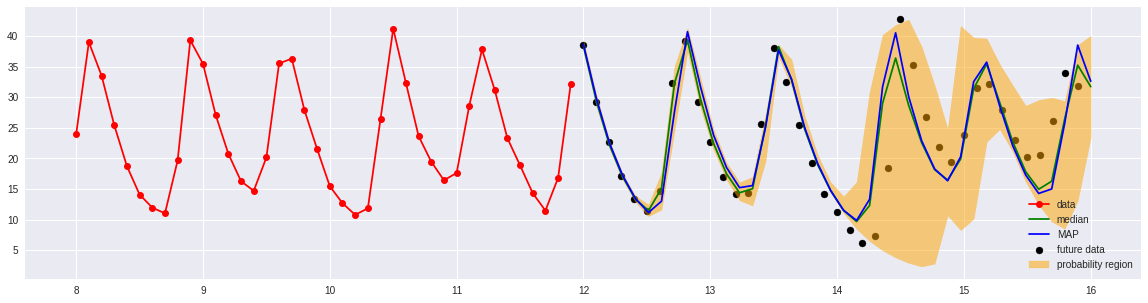

In [ ]:
plt.figure(figsize=(20, 5))
# plot data
plt.plot(np.arange(8.0, 12.0, 0.1),data3[:,2],'r-o',label='data')
#plot future data
plt.scatter(np.arange(12,16,0.1),fut_data[120:160,2], marker="o", color="k", label='future data')
# find and plot the median
median_soln = np.median(solnsz,axis=0)
plt.plot(np.linspace(12,16,40),median_soln,'g',label='median')
# find quantiles and plot probability region
q1 = np.quantile(solnsz,0.05,axis=0)
q2 = np.quantile(solnsz,0.95,axis=0)
plt.fill_between(np.linspace(12,16,40),q1,q2,color='orange',label='probability region', alpha=0.5)
#find and plot the MAP
qq = LorMCMC.Output[LorMCMC.Output[:,2].argsort()]
my_solnz = fm.make_future_data(p=qq[0,(0,1,2)], t_i=40, t_f=80)[:,2]
plt.plot(np.linspace(12,16,40),my_solnz,'b',label='MAP')
plt.legend(loc=0, shadow=True)
plt.savefig('PredZMod3_V2.png')